In [21]:
import os
import fiona
import rasterio
from rasterio.plot import show
from rasterio.plot import show_hist
from rasterio.mask import mask
from shapely.geometry import box, Polygon, mapping
import geopandas as gpd
import pandas as pd
from fiona.crs import from_epsg
import pycrs
import matplotlib.pyplot as plt
from descartes import PolygonPatch


import numpy as np
#import cartopy as cp

import random

import ipywidgets as widgets

In [2]:
badBox = widgets.Checkbox(
    value=False,
    description='Bad',
    disabled=False,
    indent=False
)
badBox

Checkbox(value=False, description='Bad', indent=False)

In [3]:
badBox.value

False

In [4]:
file = open("g_781.tif", "rb")
image = file.read()
bad781 = widgets.Image(
    value=image,
    format='png',
    width=200,
    height=200,
)

bad781
#badBox

Image(value=b'II*\x00\x08\x00\x00\x00\x11\x00\x00\x01\x03\x00\x01\x00\x00\x00\xe1\x00\x00\x00\x01\x01\x03\x00\…

In [38]:
d = {'col1': [1, 2], 'col2': [3, 4]}
df = pd.DataFrame(data=d)
df

,col1,col2
0,1,3
1,2,4


In [39]:
# Add a new row at index position 2 with values provided in list
#df.iloc[2] = ['Smriti', 26, 'Bangalore', 'India']
	
# Add a new row at index position 2 with values provided in list
df.loc[3] = ['Smriti', 26]
df

,col1,col2
0,1,3
1,2,4
3,Smriti,26


In [5]:

from ipywidgets import Layout, Button, Box, FloatText, Textarea, Dropdown, Label, IntSlider

form_item_layout = Layout(
    display='flex',
    flex_flow='row',
    justify_content='space-between'
)

form_items = [
    widgets.Checkbox(value=False, description='Bad'),
    widgets.Checkbox(value=False, description='Good'),
    Box([Label(value='# of Full Buildings'), IntSlider(min=0, max=10)], layout=form_item_layout),
    Box([Label(value='# of Partial Buildings'), IntSlider(min=0, max=10)], layout=form_item_layout),
    Box([Label(value='Egg style'),
         Dropdown(options=['Scrambled', 'Sunny side up', 'Over easy'])], layout=form_item_layout),
    Box([Label(value='Ship size'),
         FloatText()], layout=form_item_layout),
    Box([Label(value='Information'),
         Textarea()], layout=form_item_layout),
    Box([Label(value='Notes'),
         Textarea()], layout=form_item_layout)
]

form = Box(form_items, layout=Layout(
    display='flex',
    flex_flow='column',
    border='solid 2px',
    align_items='stretch',
    width='50%'
))
form

Box(children=(Checkbox(value=False, description='Bad'), Checkbox(value=False, description='Good'), Box(childre…

In [54]:
object_fit = ['none', 'contain', 'fill', 'cover']
offset = '20px 10px'
image_value = ['g_781.tif']

boxes = []
for image, caption  in zip(image_value, ['600 x 300 image', ]):
    for fit in object_fit:
        ib = widgets.Image(value=image)
        ib.layout.object_position = offset
        ib.layout.margin = image_margin
        ib.layout.object_fit = fit
        # ib.layout.height = 'inherit'
        ib.layout.width = '100%'
        title = 'object_fit: {}'.format(ib.layout.object_fit)
        boxes.append(make_box_for_grid(ib, title))

vb = VBox()
h = HTML(value='<{size}><code>object_position</code> by '
               'offset {offset} with several '
               '<code>object_fit</code>s with large image</{size}>'.format(size=caption_size,
                                                         offset=offset))
vb.layout.align_items = 'center'
hb = HBox()
hb.layout = hbox_layout
hb.children = boxes

vb.children = [h, hb]
vb

TraitError: The 'value' trait of an Image instance must be a bytes object, but a value of 'g_781.tif' <class 'str'> was specified.

In [ ]:
# display same location at three time points
# only show rgb
# show

# click next
# close out photos
# serve up new photos
# display

# 

In [ ]:
#put shapefiles over top of photos

In [4]:
# Set filepath (fix path relative to yours)
fp = "C://Users//Scott/Documents/GithubRepositories/bmoreRoofGIS/Data/osmBuildingFootprints_for2014aerialphoto2.shp"

# Read file using gpd.read_file()
sandTownShapefiles = gpd.read_file(fp)
type(sandTownShapefiles)
sandTownShapefiles.head(2)

,osm_id,osm_way_id,name,type,aeroway,amenity,admin_leve,barrier,boundary,building,...,man_made,military,natural,office,place,shop,sport,tourism,other_tags,geometry
0,None,171582387,7-Eleven,None,None,None,None,None,None,yes,...,None,None,None,None,None,convenience,None,None,"""addr:city""=>""Baltimore"",""addr:country""=>""US"",...","POLYGON ((-76.66181 39.29275, -76.66181 39.292..."
1,None,177600512,Price Busters Discount Furniture,None,None,None,None,None,None,yes,...,None,None,None,None,None,None,None,None,"""addr:city""=>""Baltimore"",""addr:country""=>""US"",...","POLYGON ((-76.65517 39.29328, -76.65514 39.292..."


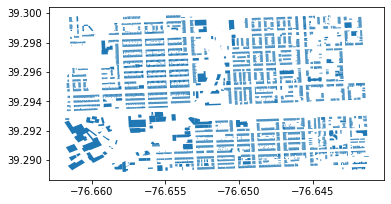

In [26]:
sandTownShapefiles.plot()

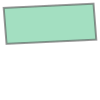

In [31]:
sandTownShapefiles.loc[28, 'geometry']

In [103]:
sandTownShapefilesSubset = sandTownShapefiles[1:10]

In [38]:
os.getcwd()

'C:\\Users\\Scott\\Desktop\\trainingData\\trainingDataAllSand\\Data'

In [89]:
sandTownShapefilesSubset.head()

,osm_id,osm_way_id,name,type,aeroway,amenity,admin_leve,barrier,boundary,building,...,man_made,military,natural,office,place,shop,sport,tourism,other_tags,geometry
1,None,177600512,Price Busters Discount Furniture,None,None,None,None,None,None,yes,...,None,None,None,None,None,None,None,None,"""addr:city""=>""Baltimore"",""addr:country""=>""US"",...","POLYGON ((-76.65517 39.29328, -76.65514 39.292..."
2,None,177601078,None,None,None,fuel,None,None,None,roof,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-76.65584 39.29329, -76.65583 39.293..."
3,None,177601079,None,None,None,None,None,None,None,yes,...,None,None,None,None,None,convenience,None,None,"""addr:city""=>""Baltimore"",""addr:country""=>""US"",...","POLYGON ((-76.65582 39.29311, -76.65581 39.293..."
4,None,177601080,McDonald's,None,None,fast_food,None,None,None,retail,...,None,None,None,None,None,None,None,None,"""addr:city""=>""Baltimore"",""addr:country""=>""US"",...","POLYGON ((-76.65686 39.29311, -76.65666 39.293..."
5,None,177601449,None,None,None,fast_food,None,None,None,yes,...,None,None,None,None,None,None,None,None,"""addr:city""=>""Baltimore"",""addr:country""=>""US"",...","POLYGON ((-76.65817 39.29362, -76.65817 39.293..."


In [54]:
type(sandTownShapefilesSubset['geometry'])

geopandas.geoseries.GeoSeries

In [90]:
sandTownShapefilesSubset['geometry'] = sandTownShapefilesSubset['geometry'].centroid

C:\Users\Scott\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [104]:
# Write those rows into a new Shapefile (the default output file format is Shapefile)
sandTownShapefilesSubset.to_file('subset.shp')

In [84]:
print('crop extent crs: ', sandTownShapefiles.crs)

crop extent crs:  {'init': 'epsg:4326'}


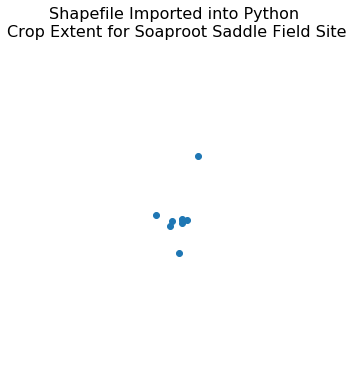

In [63]:
# plot the data
fig, ax = plt.subplots(figsize = (6, 6))
sandTownShapefilesSubset.plot(ax=ax)
ax.set_title("Shapefile Imported into Python \nCrop Extent for Soaproot Saddle Field Site", 
             fontsize = 16)
ax.set_axis_off();

In [31]:
sandTownShapefiles[0:1]

,osm_id,osm_way_id,name,type,aeroway,amenity,admin_leve,barrier,boundary,building,...,man_made,military,natural,office,place,shop,sport,tourism,other_tags,geometry
0,None,171582387,7-Eleven,None,None,None,None,None,None,yes,...,None,None,None,None,None,convenience,None,None,"""addr:city""=>""Baltimore"",""addr:country""=>""US"",...","POLYGON ((-76.66181 39.29275, -76.66181 39.292..."


In [44]:
# create geopandas of one
sandTownShapefilesOne = sandTownShapefiles[0:1]

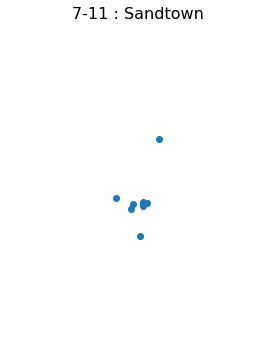

In [64]:
# plot the data
fig, ax = plt.subplots(figsize = (6, 6))
sandTownShapefilesSubset.plot(ax=ax)
ax.set_title("7-11 : Sandtown", 
             fontsize = 16)
ax.set_axis_off();

In [ ]:
#find centroid of each polygon
#

In [65]:
import rasterio.mask

with fiona.open("subset.shp", "r") as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]
    
#fp = r"201402_baltimore_city_md_6in_sp_cnir/vol001/45098103wgs84.tif"

#os.chdir('C://Users/Scott/Desktop/trainingData/trainingDataAllSand/Data/')

#src = rasterio.open(fp)
    
with rasterio.open("C://Users/Scott/Desktop/trainingData/trainingDataAllSand/Data/201402_baltimore_city_md_6in_sp_cnir/vol001/45098103wgs84.tif") as src:
    out_image, out_transform = rasterio.mask.mask(src, shapes, crop=True)
    out_meta = src.meta

C:\Users\Scott\Anaconda3\lib\site-packages\rasterio\mask.py:191: NodataShadowWarning: The dataset's nodata attribute is shadowing the alpha band. All masks will be determined by the nodata attribute
  window=window, out_shape=out_shape, masked=True, indexes=indexes)


In [43]:
#out_img, out_transform = mask(data, coords, crop=True)
#out_meta = data.meta.copy()
#epsg_code = int(data.crs.data['init'][5:])

out_meta.update({"driver": "GTiff",
                     "height": out_img.shape[1],
                     "width": out_img.shape[2],
                     "count": 3,
                     "transform": out_transform})

with rasterio.open("RGB.byte.masked.tif", "w", **out_meta) as dest:
    dest.write(out_image)

NameError: name 'out_img' is not defined

In [1]:
fig, ax = plt.subplots(figsize=(10, 10))
ep.plot_bands(lidar_chm_im,
              cmap='terrain',
              extent=extent,
              ax=ax,
              cbar=False)
crop_extent_soap.plot(ax=ax, alpha=.6, color='g');

NameError: name 'plt' is not defined

In [66]:
os.getcwd()

'C:\\Users\\Scott\\Desktop\\trainingData\\trainingDataAllSand\\Data'

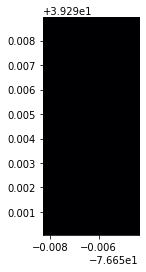

In [81]:
import fiona
import rasterio
import rasterio.mask

with fiona.open("subset.shp", "r") as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]
    
with rasterio.open("201402_baltimore_city_md_6in_sp_cnir/vol001/45098103wgs84.tif") as src:
    out_image, out_transform = rasterio.mask.mask(src, shapes, crop=True)
    out_meta = src.meta

out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "count": 4,
                 "transform": out_transform})

with rasterio.open("1909.tif", "w", **out_meta) as dest:
    dest.write(out_image[:4])
    
clipped = rasterio.open("1909.tif")
show((clipped, 4), cmap='inferno')

TypeError: unhashable type: 'Point'

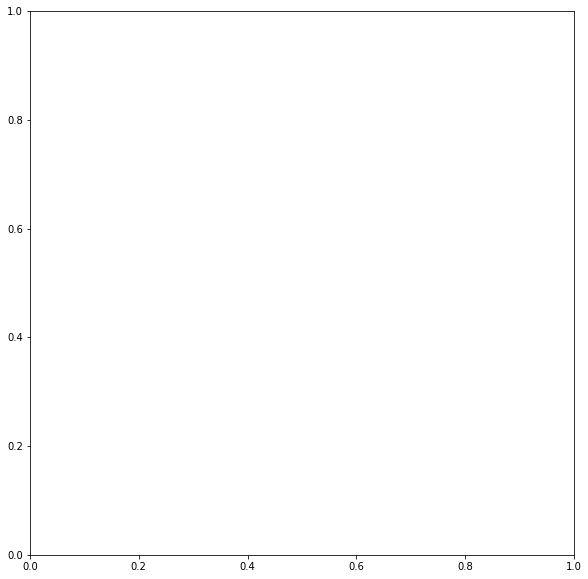

In [98]:
import matplotlib.pyplot as plt

gdf = gpd.GeoDataFrame(sandTownShapefilesSubset,
                       crs = sandTownShapefilesSubset.crs, 
                       geometry=sandTownShapefilesSubset.geometry)  #geodataframe from pandas dataframe


#gdf.Prob[gdf.Prob < 0.2]= np.nan #set probability values <0.2 to nan for transparency 

fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(column='geometry',ax=ax, alpha=0.5, legend=True)


rst = rasterio.open("201402_baltimore_city_md_6in_sp_cnir/vol001/45098103wgs84.tif")
red = rst.read(1)
rst.plot.show(red, ax=ax)

TypeError: Image data of dtype <U61 cannot be converted to float

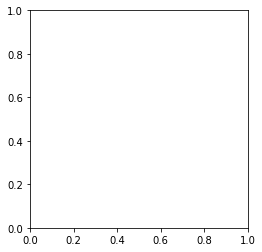

In [100]:
#rasterio.plot.show(source, with_bounds=True, contour=False, contour_label_kws=None, ax=None, title=None, transform=None, adjust='linear', **kwargs)
rasterio.plot.show("201402_baltimore_city_md_6in_sp_cnir/vol001/45098103wgs84.tif")

In [75]:
#clipped = rasterio.open("1909.tif")
plt((out_image, 4), cmap='inferno')

TypeError: 'module' object is not callable

In [76]:
shapes

[{'type': 'Point', 'coordinates': (-76.6554418665833, 39.29311595227322)},
 {'type': 'Point', 'coordinates': (-76.6558917736493, 39.2931963861387)},
 {'type': 'Point', 'coordinates': (-76.65589755079824, 39.29307810868545)},
 {'type': 'Point', 'coordinates': (-76.6567402245187, 39.293005701757515)},
 {'type': 'Point', 'coordinates': (-76.65829330000001, 39.2935674)},
 {'type': 'Point', 'coordinates': (-76.6569564051073, 39.29253176721123)},
 {'type': 'Point', 'coordinates': (-76.65589093702991, 39.29281102762095)},
 {'type': 'Point', 'coordinates': (-76.65615897441636, 39.29006694399414)},
 {'type': 'Point', 'coordinates': (-76.65436476287502, 39.29894787189731)}]

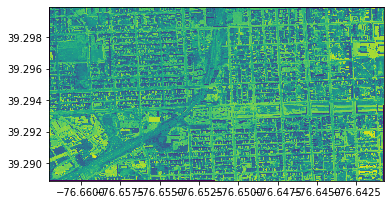

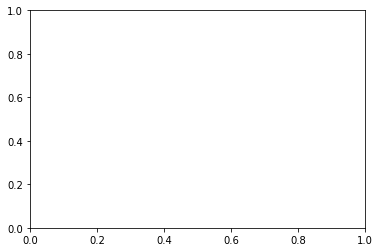

In [37]:
import fiona
import rasterio
import rasterio.plot
import matplotlib as mpl
from descartes import PolygonPatch

fp = r"201402_baltimore_city_md_6in_sp_cnir/vol001/45098103wgs84.tif"

os.chdir('C://Users/Scott/Desktop/trainingData/trainingDataAllSand/Data/')

src = rasterio.open(fp)

with fiona.open("C://Users//Scott/Documents/GithubRepositories/bmoreRoofGIS/Data/osmBuildingFootprints_for2014aerialphoto2.shp", "r") as shapefile:
    features = [feature["geometry"] for feature in shapefile]

rasterio.plot.show((src, 1))
ax = mpl.pyplot.gca()

patches = [PolygonPatch(feature) for feature in features]
ax.add_collection(mpl.collections.PatchCollection(patches))

C:\Users\Scott\Anaconda3\lib\site-packages\rasterio\plot.py:104: NodataShadowWarning: The dataset's nodata attribute is shadowing the alpha band. All masks will be determined by the nodata attribute
  arr = source.read(1, masked=True)


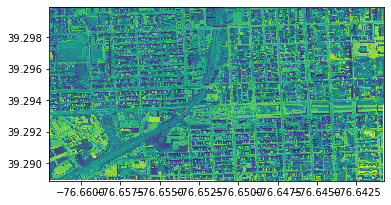

In [101]:
from rasterio.plot import show

fp = r"201402_baltimore_city_md_6in_sp_cnir/vol001/45098103wgs84.tif"

# Open the file:
raster = rasterio.open(fp)
show(raster)

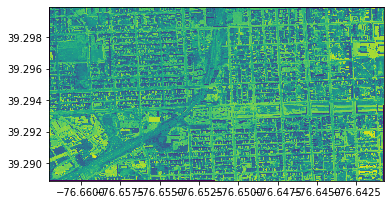

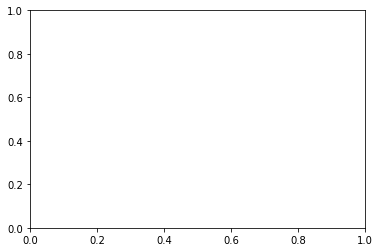

In [106]:
import fiona
import rasterio
import rasterio.plot
import matplotlib as mpl
from descartes import PolygonPatch

src = rasterio.open("201402_baltimore_city_md_6in_sp_cnir/vol001/45098103wgs84.tif")

with fiona.open("subset.shp", "r") as shapefile:
    features = [feature["geometry"] for feature in shapefile]

rasterio.plot.show((src, 1))
ax = mpl.pyplot.gca()

patches = [PolygonPatch(feature, edgecolor="red", facecolor="none", linewidth=2) for feature in features]
ax.add_collection(mpl.collections.PatchCollection(patches, match_original=True))

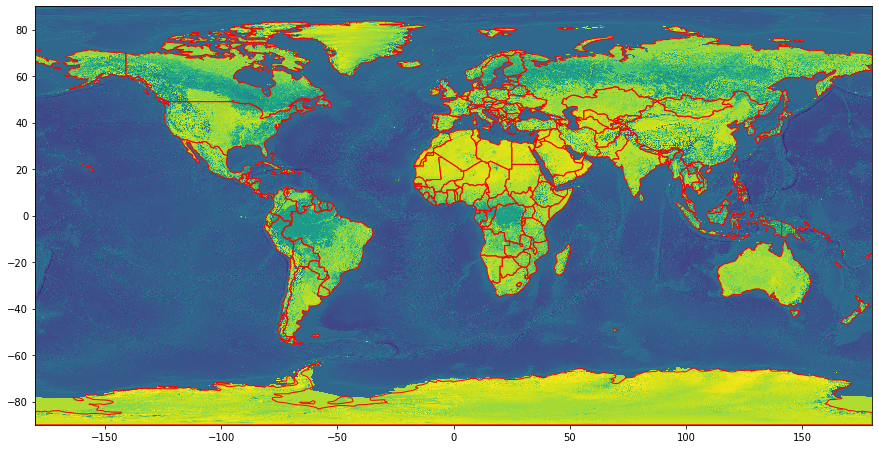

In [112]:
import matplotlib.pyplot as plt
import rasterio
import rasterio.plot

countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
raster = rasterio.open("NE1_50M_SR_W/NE1_50M_SR_W/NE1_50M_SR_W.tif")

fig, ax = plt.subplots(figsize=(15, 15))
rasterio.plot.show(raster, ax=ax)
countries.plot(ax=ax, facecolor='none', edgecolor='red')

In [113]:
type(countries)

geopandas.geodataframe.GeoDataFrame

In [114]:
countries.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


C:\Users\Scott\Anaconda3\lib\site-packages\rasterio\plot.py:104: NodataShadowWarning: The dataset's nodata attribute is shadowing the alpha band. All masks will be determined by the nodata attribute
  arr = source.read(1, masked=True)


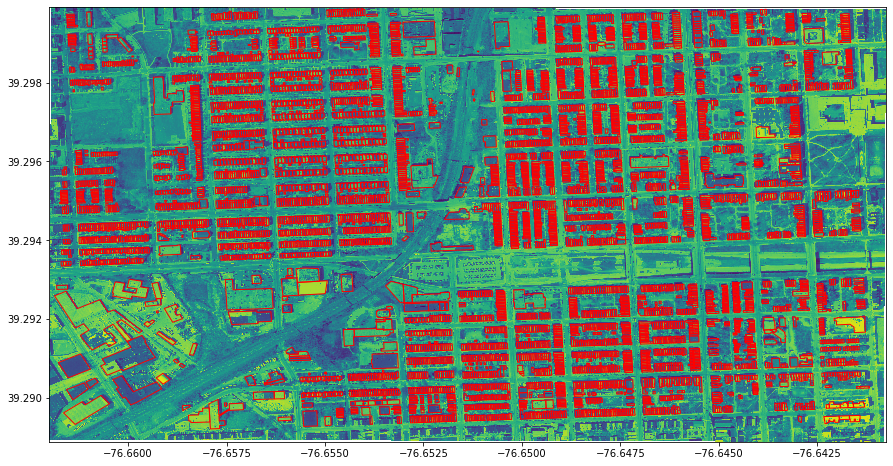

In [115]:
# Set filepath (fix path relative to yours)
fp = "C://Users//Scott/Documents/GithubRepositories/bmoreRoofGIS/Data/osmBuildingFootprints_for2014aerialphoto2.shp"

# Read file using gpd.read_file()
sandTownShapefiles = gpd.read_file(fp)

buildings = gpd.read_file(fp)
raster = rasterio.open("201402_baltimore_city_md_6in_sp_cnir/vol001/45098103wgs84.tif")

fig, ax = plt.subplots(figsize=(15, 15))
rasterio.plot.show(raster, ax=ax)
buildings.plot(ax=ax, facecolor='none', edgecolor='red')